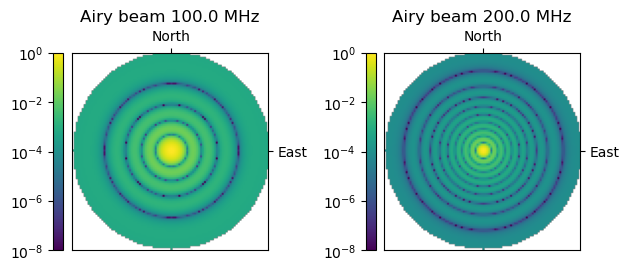

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

from pyuvdata import AiryBeam

# Create an AiryBeam with a diameter of 14.5 meters
airy_beam = AiryBeam(diameter=14.5, include_cross_pols=False)

# set up zenith angle, azimuth and frequency arrays to evaluate with
# make a regular grid in direction cosines for nice plots
n_vals = 100
zmax = np.radians(90)  # Degrees
axis_arr = np.arange(-n_vals/2., n_vals/2.) / float(n_vals/2.)
l_arr, m_arr = np.meshgrid(axis_arr, axis_arr)
radius = np.sqrt(l_arr**2 + m_arr**2)
za_array = radius * zmax
az_array = np.arctan2(m_arr, l_arr)

az_array = az_array.flatten()
za_array = za_array.flatten()

Nfreqs = 11
freqs = np.linspace(100, 200, 11) * 1e6

# find the values above the horizon so we don't evaluate beyond the horizon
above_hor = np.nonzero(za_array <= np.pi / 2.)[0]
beam_vals = np.full((1, airy_beam.Npols, Nfreqs, n_vals * n_vals), np.inf, dtype=float)

beam_vals[:, :, :, above_hor] = airy_beam.power_eval(
    az_array=az_array[above_hor], za_array=za_array[above_hor], freq_array=freqs
)

beam_vals = np.reshape(beam_vals, (1, airy_beam.Npols, Nfreqs, n_vals, n_vals))

fig, ax = plt.subplots(1, 2)
bp_low = ax[0].imshow(
    beam_vals[0,0,0],
    norm=LogNorm(vmin = 1e-8, vmax =1),
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
    origin="lower",
)
_ = ax[0].set_title(f"Airy beam {freqs[0]*1e-6} MHz")
_ = fig.colorbar(bp_low, ax=ax[0], fraction=0.046, pad=0.04, location="left")

bp_high = ax[1].imshow(
    beam_vals[0,0,-1],
    norm=LogNorm(vmin = 1e-8, vmax =1),
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
    origin="lower",
)
_ = ax[1].set_title(f"Airy beam {freqs[-1]*1e-6} MHz")
_ = fig.colorbar(bp_high, ax=ax[1], fraction=0.046, pad=0.04, location="left")


for ind in range(2):
    _ = ax[ind].set_xticks([0], labels=["North"])
    _ = ax[ind].set_yticks([0], labels=["East"])
    _ = ax[ind].yaxis.set_label_position("right")
    _ = ax[ind].yaxis.tick_right()
    _ = ax[ind].xaxis.set_label_position("top")
    _ = ax[ind].xaxis.tick_top()


fig.tight_layout()


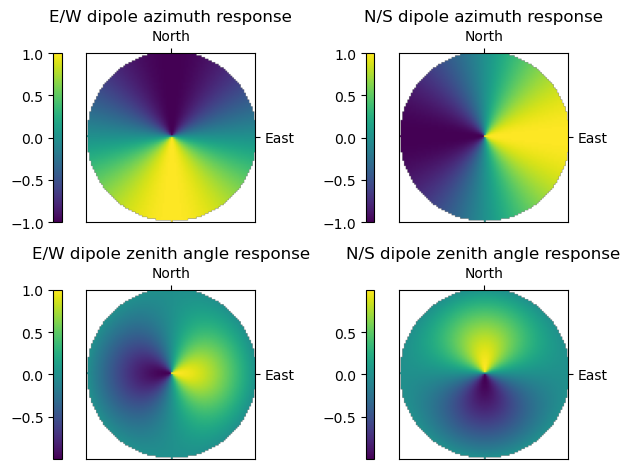

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from pyuvdata import ShortDipoleBeam

# Create an ShortDipoleBeam
dipole_beam = ShortDipoleBeam()

# set up zenith angle, azimuth and frequency arrays to evaluate with
# make a regular grid in direction cosines for nice plots
n_vals = 100
zmax = np.radians(90)  # Degrees
axis_arr = np.arange(-n_vals/2., n_vals/2.) / float(n_vals/2.)
l_arr, m_arr = np.meshgrid(axis_arr, axis_arr)
radius = np.sqrt(l_arr**2 + m_arr**2)
za_array = radius * zmax
az_array = np.arctan2(m_arr, l_arr)

az_array = az_array.flatten()
za_array = za_array.flatten()

Nfreqs = 11
freqs = np.linspace(100, 200, 11) * 1e8

# find the values above the horizon so we don't evaluate beyond the horizon
above_hor = np.nonzero(za_array <= np.pi / 2.)[0]
beam_vals = np.full((dipole_beam.Naxes_vec, dipole_beam.Nfeeds, Nfreqs, n_vals * n_vals), np.inf, dtype=complex)

beam_vals[:, :, :, above_hor] = dipole_beam.efield_eval(
    az_array=az_array[above_hor], za_array=za_array[above_hor], freq_array=freqs
)

beam_vals = np.reshape(beam_vals, (dipole_beam.Naxes_vec, dipole_beam.Nfeeds, Nfreqs, n_vals, n_vals))

fig, ax = plt.subplots(2, 2)

be00 = ax[0,0].imshow(
    beam_vals[0,0,0].real,
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
    origin="lower",
)
_ = ax[0,0].set_title("E/W dipole azimuth response")
_ = fig.colorbar(be00, ax=ax[0,0], location="left")

be10 = ax[1,0].imshow(
    beam_vals[1,0,0].real,
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
    origin="lower",
)
_ = ax[1,0].set_title("E/W dipole zenith angle response")
_ = fig.colorbar(be10, ax=ax[1,0], location="left")

be01 = ax[0,1].imshow(
    beam_vals[0,1,0].real,
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
    origin="lower",
)
_ = ax[0,1].set_title("N/S dipole azimuth response")
_ = fig.colorbar(be01, ax=ax[0,1], location="left")

be11 = ax[1,1].imshow(
    beam_vals[1,1,0].real,
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
    origin="lower",
)
_ = ax[1,1].set_title("N/S dipole zenith angle response")
_ = fig.colorbar(be11, ax=ax[1,1], location="left")

for row_ind in range(2):
    for col_ind in range(2):
     _ = ax[row_ind,col_ind].set_xticks([0], labels=["North"])
     _ = ax[row_ind,col_ind].set_yticks([0], labels=["East"])
     _ = ax[row_ind,col_ind].yaxis.set_label_position("right")
     _ = ax[row_ind,col_ind].yaxis.tick_right()
     _ = ax[row_ind,col_ind].xaxis.set_label_position("top")
     _ = ax[row_ind,col_ind].xaxis.tick_top()

fig.tight_layout()

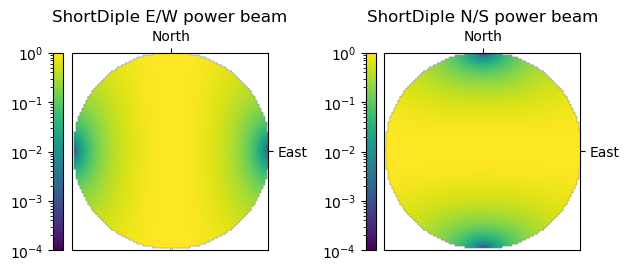

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

from pyuvdata import ShortDipoleBeam

# Create an ShortDipoleBeam
dipole_beam = ShortDipoleBeam(include_cross_pols=False)

# set up zenith angle, azimuth and frequency arrays to evaluate with
# make a regular grid in direction cosines for nice plots
n_vals = 100
zmax = np.radians(90)  # Degrees
axis_arr = np.arange(-n_vals/2., n_vals/2.) / float(n_vals/2.)
l_arr, m_arr = np.meshgrid(axis_arr, axis_arr)
radius = np.sqrt(l_arr**2 + m_arr**2)
za_array = radius * zmax
az_array = np.arctan2(m_arr, l_arr)

az_array = az_array.flatten()
za_array = za_array.flatten()

Nfreqs = 11
freqs = np.linspace(100, 200, 11) * 1e6

# find the values above the horizon so we don't evaluate beyond the horizon
above_hor = np.nonzero(za_array <= np.pi / 2.)[0]
beam_vals = np.full((1, dipole_beam.Npols, Nfreqs, n_vals * n_vals), np.inf, dtype=float)

beam_vals[:, :, :, above_hor] = dipole_beam.power_eval(
    az_array=az_array[above_hor], za_array=za_array[above_hor], freq_array=freqs
)

beam_vals = np.reshape(beam_vals, (1, dipole_beam.Npols, Nfreqs, n_vals, n_vals))

fig, ax = plt.subplots(1, 2)

ew_dipole = ax[0].imshow(
    beam_vals[0, 0, 0].real,
    norm=LogNorm(vmin = 1e-4, vmax =1),
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
    origin="lower",
)
_ = ax[0].set_title(f"ShortDiple E/W power beam")
_ = fig.colorbar(ew_dipole, ax=ax[0], fraction=0.046, pad=0.04, location="left")

ns_dipole = ax[1].imshow(
    beam_vals[0, 1, 0].real,
    norm=LogNorm(vmin = 1e-4, vmax =1),
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
    origin="lower",
)
_ = ax[1].set_title(f"ShortDiple N/S power beam")
_ = fig.colorbar(ns_dipole, ax=ax[1], fraction=0.046, pad=0.04, location="left")

for ind in range(2):
    _ = ax[ind].set_xticks([0], labels=["North"])
    _ = ax[ind].set_yticks([0], labels=["East"])
    _ = ax[ind].yaxis.set_label_position("right")
    _ = ax[ind].yaxis.tick_right()
    _ = ax[ind].xaxis.set_label_position("top")
    _ = ax[ind].xaxis.tick_top()


fig.tight_layout()


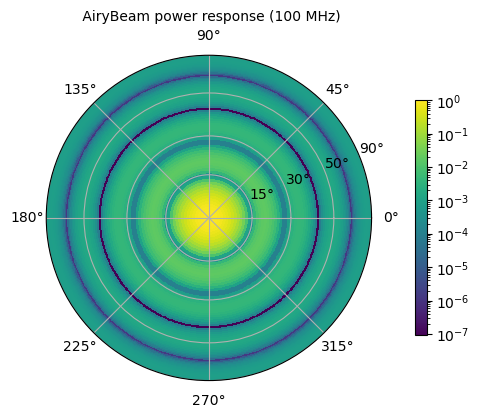

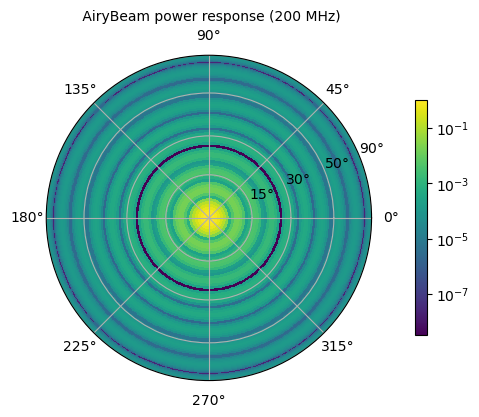

In [1]:
from pyuvdata import AiryBeam

# Create an AiryBeam with a diameter of 14.5 meters
airy_beam = AiryBeam(diameter=14.5, feed_array=["x"])
airy_beam.plot(beam_type="power", freq=100e6)
airy_beam.plot(beam_type="power", freq=200e6)

real


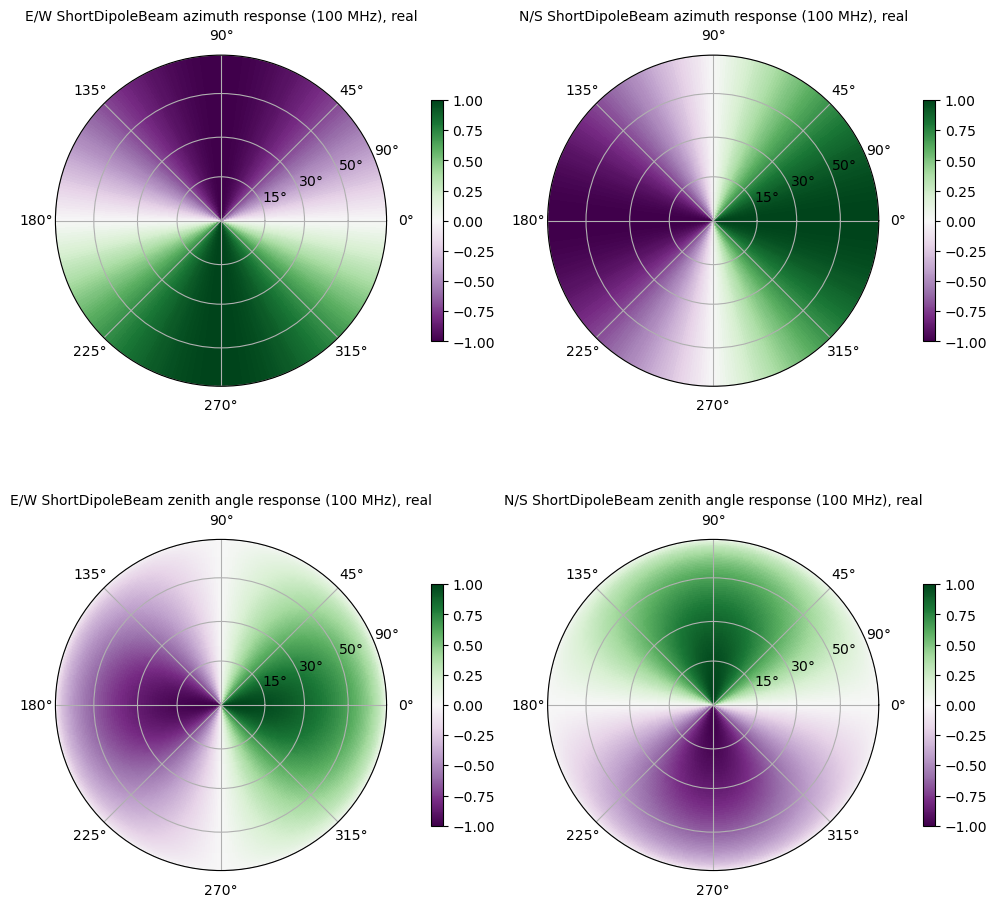

In [1]:
from pyuvdata import ShortDipoleBeam

# Create an ShortDipoleBeam
dipole_beam = ShortDipoleBeam()
dipole_beam.plot(beam_type="efield", freq=100e6)

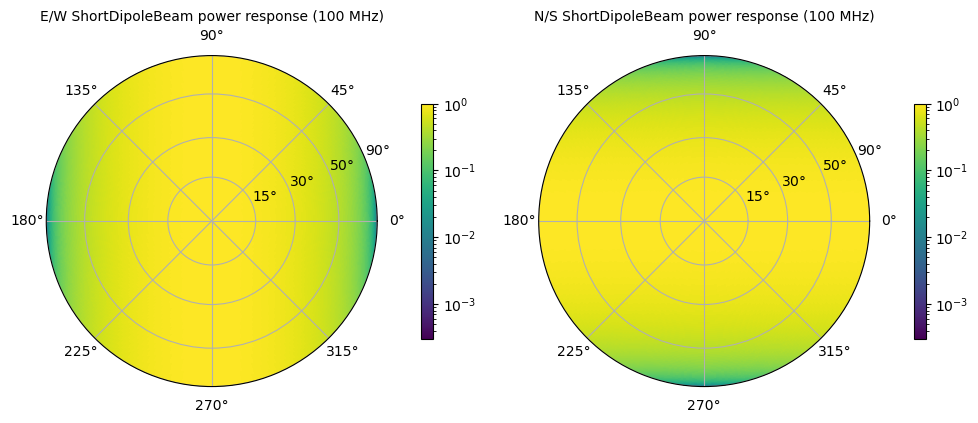

In [2]:
from pyuvdata import ShortDipoleBeam

# Create an ShortDipoleBeam
dipole_beam = ShortDipoleBeam(include_cross_pols=False)
dipole_beam.plot(beam_type="power", freq=100e6)